In [43]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats

In [44]:
boston_url = 'c:\\Users\\fim82wi\\Downloads\\boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [45]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


<h1><b>TASK 4</b></h1>

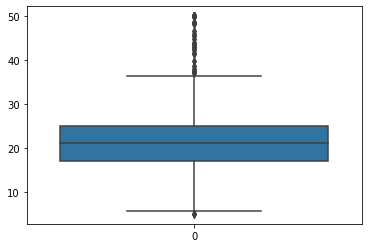

In [46]:
# Boxplot for the "Median value of owner-occupied homes"
ax = sns.boxplot(data=boston_df['MEDV'])

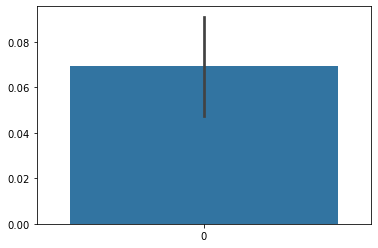

In [47]:
# Bar plot for the Charles river variable
ax = sns.barplot(data=boston_df['CHAS'])

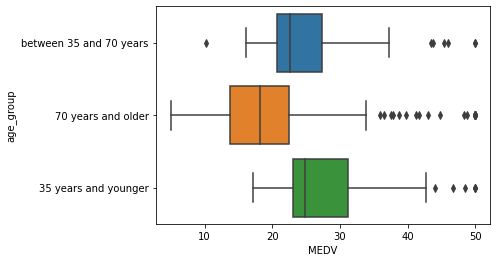

In [48]:
# Boxplot for the MEDV variable vs the AGE variable

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

ax = sns.boxplot(x="MEDV",  y="age_group",
                 data=boston_df)

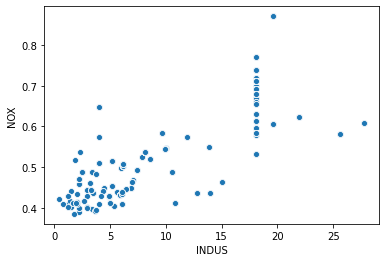

In [49]:
# Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
ax = sns.scatterplot(x='INDUS', y='NOX',
                     data=boston_df)

Answer: <p>
If the higher proportion of non-retail business acres per town (INDUS) rises also the nitric oxides concentration (NOX) rises. So people had to drive more distances to reach the business areas.

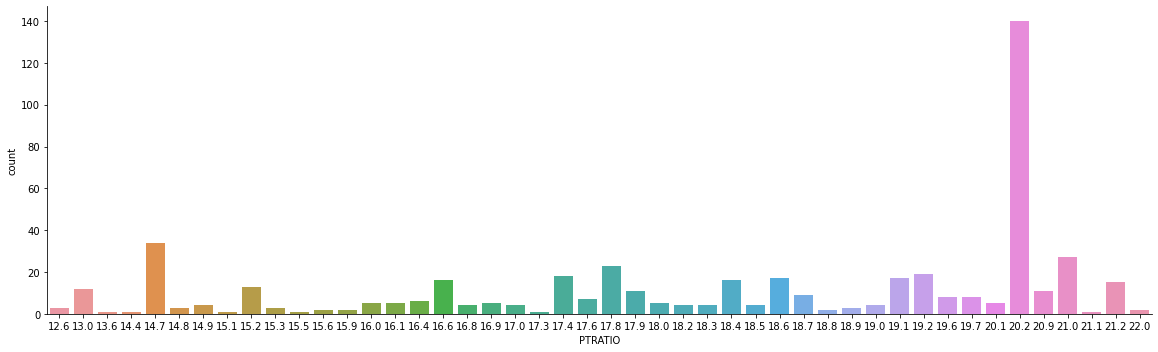

In [50]:
# Histogram for the pupil to teacher ratio variable
sns.catplot(x='PTRATIO', kind='count', data=boston_df, aspect=3.2)

<h1><b>TASK 5</b></h1>

<h1>Point 1</h1>
Question: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river or not")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the Charles river or not")

In [51]:
# t-test for independent samples
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

Answere: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river or not

<h1>Point 2</h1>
Question: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis

*   $H\_0: µ\_1 = µ\_2$ (the two population means are equal)
*   $H\_1:  µ\_1 ≠ µ\_2$ (the two population means differ)

In [52]:
# Calculate 1940: 2022 - 83(AGE) = 1939
# Make 2 samples
before1940 = boston_df[boston_df['AGE'] >= 83.0]['MEDV']
after1940 = boston_df[boston_df['AGE'] < 83.0]['MEDV']
#ANOVA
f_statistic, p_value = scipy.stats.f_oneway(before1940, after1940)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 65.51513325324015, P-Value: 4.354004757227418e-15


Answere: Since the p-value is less than 0.05, we will reject the null hypothesis as there is significant evidence that at the two means differ.

<h1>Point 3</h1>
Question: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis
*   $H\_0:$ There is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town
*   $H\_1:$ There is a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

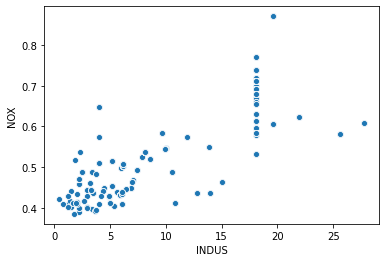

In [53]:
# Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
ax = sns.scatterplot(x='INDUS', y='NOX',
                     data=boston_df)

In [54]:
f_statistic, p_value = scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 0.763651446920915, P-Value: 7.913361061239593e-98


Answere: Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

<h1>Point 4</h1>
Question: ? (Regression analysis)What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

Hypothesis
*   $H\_0: µ1 = µ2$ (the two population means are equal)
*   $H\_1:  µ\_1 ≠ µ\_2$ (the two population means differ)

In [55]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 11 Aug 2022   Prob (F-statistic):           1.21e-08
Time:                        09:36:01   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Answere: The p-value (row:DIS, col:P>|t|) is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is a difference in the median value of owner occupied homes based on the weighted distance  to the five Boston employment centres.